In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('EORIC_AWS_Weather_Data_2019_12_12.csv',parse_dates=['Date'])

In [3]:
df.head()

,Line#,Date,Time,speed,Pressure,Rain,Humidity,dew,solar,water,wind dir,wind speed,Temperature
0,1,2017-02-16,3:00:00 PM,4.2,976.8,0.0,42.0,19.61,444,0.0933,154,1.1,34.36
1,2,2017-02-16,3:30:00 PM,4.9,976.5,0.0,40.0,19.16,338,0.0933,45,1.1,34.73
2,3,2017-02-16,4:00:00 PM,4.6,976.2,0.0,39.4,18.61,109,0.0933,45,1.1,34.39
3,4,2017-02-16,4:30:00 PM,4.2,976.1,0.0,40.0,18.92,126,0.0933,46,0.8,34.47
4,5,2017-02-16,5:00:00 PM,3.4,976.2,0.0,39.1,18.63,84,0.0925,100,0.8,34.55


In [4]:
df.drop(['Rain','dew','solar'],axis=1,inplace=True)

In [5]:
df.head()

,Line#,Date,Time,speed,Pressure,Humidity,water,wind dir,wind speed,Temperature
0,1,2017-02-16,3:00:00 PM,4.2,976.8,42.0,0.0933,154,1.1,34.36
1,2,2017-02-16,3:30:00 PM,4.9,976.5,40.0,0.0933,45,1.1,34.73
2,3,2017-02-16,4:00:00 PM,4.6,976.2,39.4,0.0933,45,1.1,34.39
3,4,2017-02-16,4:30:00 PM,4.2,976.1,40.0,0.0933,46,0.8,34.47
4,5,2017-02-16,5:00:00 PM,3.4,976.2,39.1,0.0925,100,0.8,34.55


In [6]:
df.isnull().sum()

Line#              0
Date               0
Time               0
speed              0
Pressure           0
Humidity           0
water              0
wind dir           0
wind speed     30729
Temperature     9402
dtype: int64

In [7]:
df.drop('wind speed',axis=1,inplace=True)

In [8]:
df.head()

,Line#,Date,Time,speed,Pressure,Humidity,water,wind dir,Temperature
0,1,2017-02-16,3:00:00 PM,4.2,976.8,42.0,0.0933,154,34.36
1,2,2017-02-16,3:30:00 PM,4.9,976.5,40.0,0.0933,45,34.73
2,3,2017-02-16,4:00:00 PM,4.6,976.2,39.4,0.0933,45,34.39
3,4,2017-02-16,4:30:00 PM,4.2,976.1,40.0,0.0933,46,34.47
4,5,2017-02-16,5:00:00 PM,3.4,976.2,39.1,0.0925,100,34.55


In [9]:
df.replace('[A-Za-z]','',regex=True,inplace=True)

In [10]:
df.head(10)

,Line#,Date,Time,speed,Pressure,Humidity,water,wind dir,Temperature
0,1,2017-02-16,3:00:00,4.2,976.8,42.0,0.0933,154,34.36
1,2,2017-02-16,3:30:00,4.9,976.5,40.0,0.0933,45,34.73
2,3,2017-02-16,4:00:00,4.6,976.2,39.4,0.0933,45,34.39
3,4,2017-02-16,4:30:00,4.2,976.1,40.0,0.0933,46,34.47
4,5,2017-02-16,5:00:00,3.4,976.2,39.1,0.0925,100,34.55
5,6,2017-02-16,5:30:00,3.0,976.4,37.8,0.0925,108,34.47
6,7,2017-02-16,6:00:00,4.2,976.5,38.0,0.0918,108,33.63
7,8,2017-02-16,6:30:00,0.8,976.8,40.3,0.0918,117,32.07
8,9,2017-02-16,7:00:00,0.0,977.0,43.5,0.0911,136,31.15
9,10,2017-02-16,7:30:00,0.0,977.4,44.8,0.0904,136,30.65


In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.replace(0,np.nan,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34177 entries, 0 to 36608
Data columns (total 9 columns):
Line#          34177 non-null int64
Date           34177 non-null datetime64[ns]
Time           34177 non-null object
speed          30160 non-null float64
Pressure       34177 non-null float64
Humidity       34177 non-null float64
water          34177 non-null float64
wind dir       34152 non-null float64
Temperature    34177 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 2.6+ MB


In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imputer = SimpleImputer(missing_values=np.nan,
    strategy='median')

In [16]:
flot_col = [cols for cols in df.columns if df[cols].dtype == 'float64']

In [17]:
flot_col

['speed', 'Pressure', 'Humidity', 'water', 'wind dir', 'Temperature']

In [18]:
df[flot_col].head()

,speed,Pressure,Humidity,water,wind dir,Temperature
0,4.2,976.8,42.0,0.0933,154.0,34.36
1,4.9,976.5,40.0,0.0933,45.0,34.73
2,4.6,976.2,39.4,0.0933,45.0,34.39
3,4.2,976.1,40.0,0.0933,46.0,34.47
4,3.4,976.2,39.1,0.0925,100.0,34.55


In [19]:
df[flot_col]= imputer.fit_transform(df[flot_col])

In [20]:
df[flot_col].isnull().sum()

speed          0
Pressure       0
Humidity       0
water          0
wind dir       0
Temperature    0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34177 entries, 0 to 36608
Data columns (total 9 columns):
Line#          34177 non-null int64
Date           34177 non-null datetime64[ns]
Time           34177 non-null object
speed          34177 non-null float64
Pressure       34177 non-null float64
Humidity       34177 non-null float64
water          34177 non-null float64
wind dir       34177 non-null float64
Temperature    34177 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 2.6+ MB


In [22]:
df.tail(10)

,Line#,Date,Time,speed,Pressure,Humidity,water,wind dir,Temperature
36599,36600,2019-04-28,3:30:00,2.3,978.9,94.3,0.2182,202.0,25.21
36600,36601,2019-04-28,4:00:00,2.7,978.9,94.5,0.2182,208.0,24.97
36601,36602,2019-04-28,4:30:00,1.5,979.0,94.8,0.2175,205.0,24.70
36602,36603,2019-04-28,5:00:00,1.5,979.3,95.2,0.2175,211.0,24.65
36603,36604,2019-04-28,5:30:00,3.8,979.4,95.2,0.2167,194.0,24.58
36604,36605,2019-04-28,6:00:00,3.4,979.4,95.5,0.2175,194.0,24.29
36605,36606,2019-04-28,6:30:00,2.3,979.7,96.1,0.2167,192.0,24.63
36606,36607,2019-04-28,7:00:00,2.7,979.9,95.8,0.2167,198.0,25.70
36607,36608,2019-04-28,7:30:00,3.0,980.4,93.9,0.2167,205.0,26.62
36608,36609,2019-04-28,8:00:00,4.2,980.8,90.4,0.2167,239.0,27.23


In [23]:
df.drop('Line#',axis=True,inplace=True)

In [24]:
df.head()

,Date,Time,speed,Pressure,Humidity,water,wind dir,Temperature
0,2017-02-16,3:00:00,4.2,976.8,42.0,0.0933,154.0,34.36
1,2017-02-16,3:30:00,4.9,976.5,40.0,0.0933,45.0,34.73
2,2017-02-16,4:00:00,4.6,976.2,39.4,0.0933,45.0,34.39
3,2017-02-16,4:30:00,4.2,976.1,40.0,0.0933,46.0,34.47
4,2017-02-16,5:00:00,3.4,976.2,39.1,0.0925,100.0,34.55


In [25]:
new_date =[]
new_time =[]
for i in range(len(df)):
    if(i % 2 ==0):
        continue
    else:
        new_date.append(df.iloc[i]['Date'])
        new_time.append(df.iloc[i]['Time'])

In [26]:
new_temp = []
new_windspeed=[]
new_winddir=[]
new_water = []
new_pres=[]
new_humid=[]
for i in range(len(df)):
    if(i % 2 ==0):
        continue
    else:
        new_pres.append((df.iloc[i]['Pressure']+df.iloc[i+1]['Pressure'])/2)
        new_temp.append((df.iloc[i]['Temperature']+df.iloc[i+1]['Temperature'])/2)
        new_windspeed.append((df.iloc[i]['speed']+df.iloc[i+1]['speed'])/2)
        new_winddir.append((df.iloc[i]['wind dir']+df.iloc[i+1]['wind dir'])/2)
        new_water.append((df.iloc[i]['water']+df.iloc[i+1]['water'])/2)
        new_humid.append((df.iloc[i]['Humidity']+df.iloc[i+1]['Humidity'])/2)

In [27]:
newData = pd.DataFrame({'Date':new_date,
                          'Time':new_time,
                          'windSpeed':new_windspeed,
                          'Water':new_water,
                          'Wind dir':new_winddir,
                          'Pressure':new_pres,
                          'Temperature':new_temp,
                          'RH':new_humid
                          })

In [28]:
newData.head()

,Date,Time,windSpeed,Water,Wind dir,Pressure,Temperature,RH
0,2017-02-16,3:30:00,4.75,0.09330,45.0,976.35,34.56,39.70
1,2017-02-16,4:30:00,3.80,0.09290,73.0,976.15,34.51,39.55
2,2017-02-16,5:30:00,3.60,0.09215,108.0,976.45,34.05,37.90
3,2017-02-16,6:30:00,2.30,0.09145,126.5,976.90,31.61,41.90
4,2017-02-16,7:30:00,3.80,0.09040,136.0,977.75,30.47,44.50


In [29]:
newData.shape

(17088, 8)

In [30]:
newData['Month'] = newData['Date'].dt.month

In [31]:
newData['Hour'] = newData['Date'].dt.hour

In [32]:
newData.head()

,Date,Time,windSpeed,Water,Wind dir,Pressure,Temperature,RH,Month,Hour
0,2017-02-16,3:30:00,4.75,0.09330,45.0,976.35,34.56,39.70,2,0
1,2017-02-16,4:30:00,3.80,0.09290,73.0,976.15,34.51,39.55,2,0
2,2017-02-16,5:30:00,3.60,0.09215,108.0,976.45,34.05,37.90,2,0
3,2017-02-16,6:30:00,2.30,0.09145,126.5,976.90,31.61,41.90,2,0
4,2017-02-16,7:30:00,3.80,0.09040,136.0,977.75,30.47,44.50,2,0


In [33]:
newData.tail(20)

,Date,Time,windSpeed,Water,Wind dir,Pressure,Temperature,RH,Month,Hour
17068,2019-04-27,12:30:00,5.70,0.22875,188.0,979.05,31.380,73.00,4,0
17069,2019-04-27,1:30:00,5.50,0.22725,225.5,978.10,32.805,68.70,4,0
17070,2019-04-27,2:30:00,4.60,0.22620,211.0,977.30,32.500,68.10,4,0
17071,2019-04-27,3:30:00,3.80,0.22505,227.0,977.00,32.425,69.75,4,0
17072,2019-04-27,4:30:00,2.85,0.22435,254.0,976.95,31.420,71.90,4,0
17073,2019-04-27,5:30:00,4.40,0.22330,260.0,977.30,29.355,77.60,4,0
17074,2019-04-27,6:30:00,2.85,0.22250,264.0,977.90,28.180,82.40,4,0
17075,2019-04-27,7:30:00,1.30,0.22180,264.5,978.70,27.675,84.60,4,0
17076,2019-04-27,8:30:00,0.75,0.22110,267.0,979.55,27.345,86.00,4,0
17077,2019-04-27,9:30:00,2.10,0.22040,267.0,980.25,26.890,87.30,4,0


In [34]:
newData['Time']= pd.to_datetime(newData.Time)

In [35]:
newData.head()

,Date,Time,windSpeed,Water,Wind dir,Pressure,Temperature,RH,Month,Hour
0,2017-02-16,2020-08-27 03:30:00,4.75,0.09330,45.0,976.35,34.56,39.70,2,0
1,2017-02-16,2020-08-27 04:30:00,3.80,0.09290,73.0,976.15,34.51,39.55,2,0
2,2017-02-16,2020-08-27 05:30:00,3.60,0.09215,108.0,976.45,34.05,37.90,2,0
3,2017-02-16,2020-08-27 06:30:00,2.30,0.09145,126.5,976.90,31.61,41.90,2,0
4,2017-02-16,2020-08-27 07:30:00,3.80,0.09040,136.0,977.75,30.47,44.50,2,0


In [36]:
newData['Hour'] = newData['Time'].dt.hour

In [37]:
newData.head(10)

,Date,Time,windSpeed,Water,Wind dir,Pressure,Temperature,RH,Month,Hour
0,2017-02-16,2020-08-27 03:30:00,4.75,0.09330,45.0,976.35,34.560,39.70,2,3
1,2017-02-16,2020-08-27 04:30:00,3.80,0.09290,73.0,976.15,34.510,39.55,2,4
2,2017-02-16,2020-08-27 05:30:00,3.60,0.09215,108.0,976.45,34.050,37.90,2,5
3,2017-02-16,2020-08-27 06:30:00,2.30,0.09145,126.5,976.90,31.610,41.90,2,6
4,2017-02-16,2020-08-27 07:30:00,3.80,0.09040,136.0,977.75,30.470,44.50,2,7
5,2017-02-16,2020-08-27 08:30:00,2.10,0.08960,136.0,978.75,30.220,43.85,2,8
6,2017-02-16,2020-08-27 09:30:00,2.10,0.08925,135.5,979.60,29.435,44.70,2,9
7,2017-02-16,2020-08-27 10:30:00,4.55,0.08960,131.0,980.00,29.245,44.35,2,10
8,2017-02-16,2020-08-27 11:30:00,4.00,0.08855,195.0,980.15,27.175,68.35,2,11
9,2017-02-17,2020-08-27 12:30:00,3.05,0.08820,202.5,979.85,26.550,76.90,2,12


In [38]:
newData.drop(['Date','Time'],axis=1,inplace=True)

In [39]:
newData.head()

,windSpeed,Water,Wind dir,Pressure,Temperature,RH,Month,Hour
0,4.75,0.09330,45.0,976.35,34.56,39.70,2,3
1,3.80,0.09290,73.0,976.15,34.51,39.55,2,4
2,3.60,0.09215,108.0,976.45,34.05,37.90,2,5
3,2.30,0.09145,126.5,976.90,31.61,41.90,2,6
4,3.80,0.09040,136.0,977.75,30.47,44.50,2,7


In [40]:
cols_arr = list(newData.columns.values)

In [41]:
cols = [
 'Month',
 'Hour',
 'windSpeed',
 'Water',
 'Wind dir',
 'Pressure',
 'Temperature',
 'RH']

In [42]:
newData = newData[cols]

In [43]:
newData.head()

,Month,Hour,windSpeed,Water,Wind dir,Pressure,Temperature,RH
0,2,3,4.75,0.09330,45.0,976.35,34.56,39.70
1,2,4,3.80,0.09290,73.0,976.15,34.51,39.55
2,2,5,3.60,0.09215,108.0,976.45,34.05,37.90
3,2,6,2.30,0.09145,126.5,976.90,31.61,41.90
4,2,7,3.80,0.09040,136.0,977.75,30.47,44.50


In [44]:
newData['Month'] = newData['Month'].astype('float64')

In [45]:
newData['Hour'] = newData['Hour'].astype('float64')

In [46]:
newData.head()

,Month,Hour,windSpeed,Water,Wind dir,Pressure,Temperature,RH
0,2.0,3.0,4.75,0.09330,45.0,976.35,34.56,39.70
1,2.0,4.0,3.80,0.09290,73.0,976.15,34.51,39.55
2,2.0,5.0,3.60,0.09215,108.0,976.45,34.05,37.90
3,2.0,6.0,2.30,0.09145,126.5,976.90,31.61,41.90
4,2.0,7.0,3.80,0.09040,136.0,977.75,30.47,44.50


In [47]:
newData.describe()

,Month,Hour,windSpeed,Water,Wind dir,Pressure,Temperature,RH
count,17088.000000,17088.000000,17088.000000,17088.000000,17088.000000,17088.000000,17088.000000,17088.000000
mean,5.817065,6.499649,3.789949,0.168981,191.761324,979.910569,26.465530,77.368440
std,3.287480,3.452272,1.684853,0.042054,69.278274,2.209753,3.791953,19.435437
min,1.000000,1.000000,0.400000,0.083800,1.000000,972.600000,17.930000,11.300000
25%,3.000000,3.000000,2.650000,0.132500,169.500000,978.400000,23.410000,67.400000
50%,5.000000,6.000000,3.800000,0.172400,198.000000,980.000000,25.612500,83.050000
75%,9.000000,9.250000,4.750000,0.203700,232.000000,981.450000,29.166250,92.900000
max,12.000000,12.000000,17.900000,0.351450,358.000000,987.800000,38.270000,100.000000


## Data Exploratory Analysis

Month
8.0     89.177835
9.0     88.750208
7.0     88.228404
6.0     86.954851
10.0    85.988870
11.0    84.427841
5.0     82.517698
4.0     78.440692
3.0     71.080494
12.0    66.537164
2.0     59.879876
1.0     53.875018
Name: RH, dtype: float64


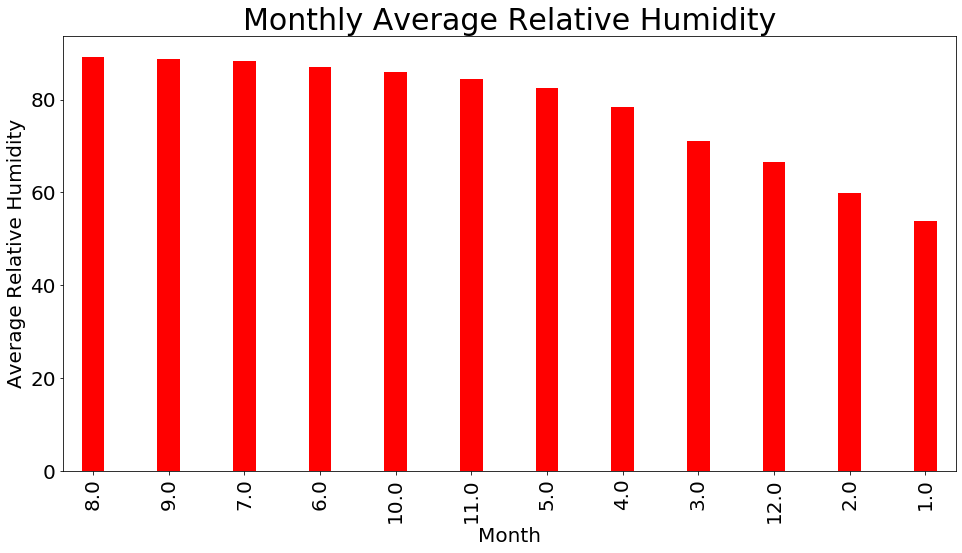

In [48]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df1 = newData.groupby('Month').mean().sort_values(by='RH',
            ascending=False)['RH'].plot(kind='bar',color='r',width=0.3,title='Monthly Average Relative Humidity',fontsize=20)
plt.ylabel('Average Relative Humidity')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print( newData.groupby('Month').mean().sort_values(by='RH',
            ascending=False)['RH'])

In [49]:
df2 = newData.groupby('Hour').sum()['RH']
df2_n = pd.DataFrame(df2)
# for key,val in df2.items():
#     print(key)
#     print(val)


In [50]:
df2_n['Hour'] = df2_n.index

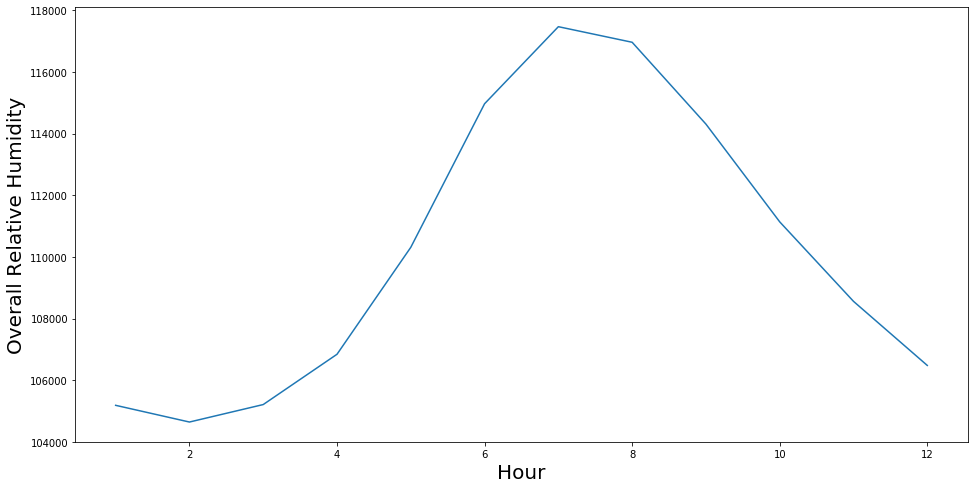

In [51]:

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.lineplot(x='Hour',y='RH',data=df2_n)
plt.ylabel('Overall Relative Humidity')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

In [52]:
numeric_features = ['windSpeed','Water','Wind dir','Pressure','Temperature']

Text(0, 0.5, 'Humidity')

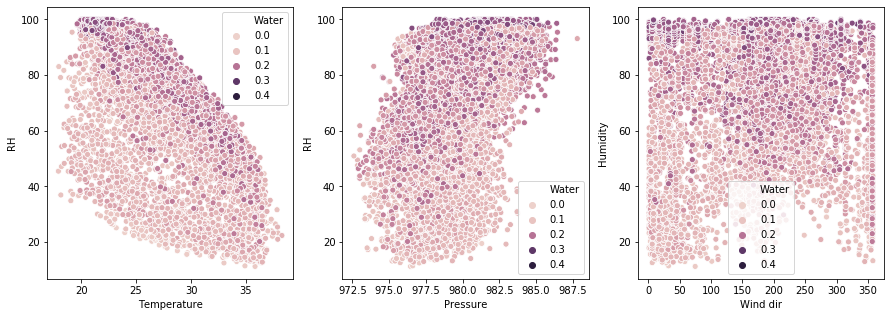

In [53]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
#Temperature with RH
sns.scatterplot(x='Temperature',y='RH',hue='Water',data=newData,ax=axes[0])
plt.xlabel('Temperature')
plt.ylabel('Humidity')

sns.scatterplot(x='Pressure',y='RH',hue='Water',data=newData,ax=axes[1])
plt.xlabel('Pressure')
plt.ylabel('Humidity')

sns.scatterplot(x='Wind dir',y='RH',hue='Water',data=newData,ax=axes[2])
plt.xlabel('Wind dir')
plt.ylabel('Humidity')

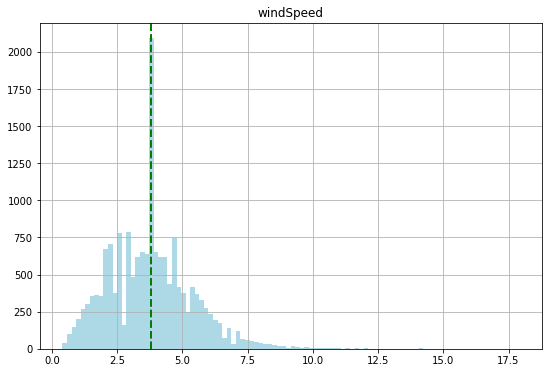

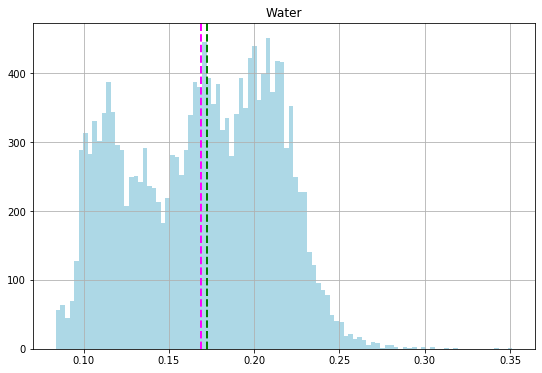

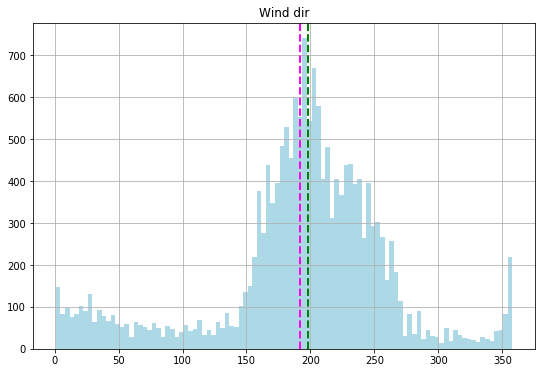

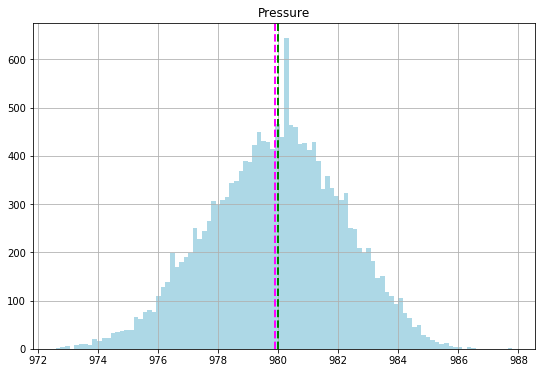

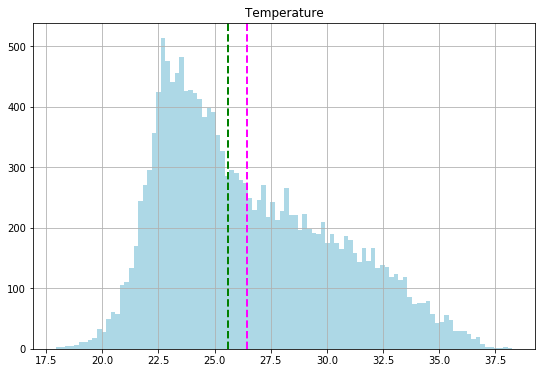

In [54]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = newData[col]
    feature.hist(color='lightblue', bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

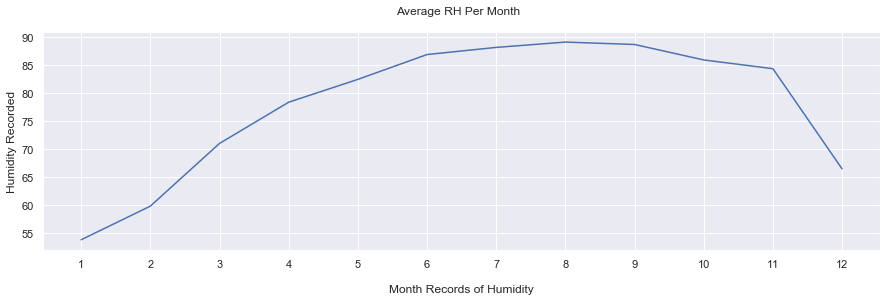

In [55]:
d1 = newData.groupby('Month').aggregate({'RH':'mean'})
d1 = d1.reset_index()
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Month', y='RH', data=d1)
ax.set(xticks=d1.Month.values)
plt.xlabel("\nMonth Records of Humidity")
plt.ylabel("Humidity Recorded")
plt.title("Average RH Per Month  \n")
plt.show()

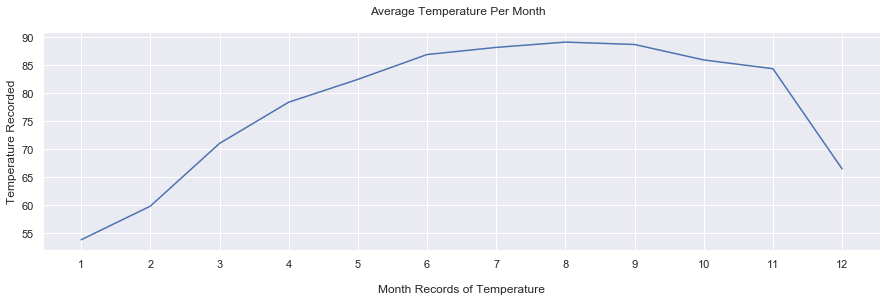

In [56]:
d2 = newData.groupby('Month').aggregate({'Temperature':'mean'})
d2 = d1.reset_index()
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Month', y='RH', data=d2)
ax.set(xticks=d2.Month.values)
plt.xlabel("\nMonth Records of Temperature")
plt.ylabel("Temperature Recorded")
plt.title("Average Temperature Per Month  \n")
plt.show()

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split

In [58]:
target = newData.RH
data = newData.drop('RH',axis=1)

In [59]:
data.head()

,Month,Hour,windSpeed,Water,Wind dir,Pressure,Temperature
0,2.0,3.0,4.75,0.09330,45.0,976.35,34.56
1,2.0,4.0,3.80,0.09290,73.0,976.15,34.51
2,2.0,5.0,3.60,0.09215,108.0,976.45,34.05
3,2.0,6.0,2.30,0.09145,126.5,976.90,31.61
4,2.0,7.0,3.80,0.09040,136.0,977.75,30.47


In [60]:
scaler = StandardScaler()

In [61]:
data.iloc[:,2:7] = scaler.fit_transform(data.iloc[:,2:7])

In [62]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=123)

## Training With XGBOOST

In [63]:
#from sklearn import cross_validation
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [64]:
gbm = xgb.XGBRegressor()

In [65]:
gbm.fit(x_train,y_train) 

C:\Users\Tornado\.conda\envs\tensorflow_env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[06:46:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [66]:
xgd_predict = gbm.predict(x_test)

In [67]:
gbm.score(x_train,y_train)

0.8934040433091538

## with LIGHTGBM

In [68]:
import lightgbm as lgb
import catboost as cgb
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score

In [69]:
lg_reg = lgb.LGBMRegressor(max_depth=10,n_estimators=1000,learning_rate=0.1)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
lg_reg.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=10,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [72]:
lg_reg.score(x_train,y_train)

0.9895704219653911

In [73]:
lg_predict=lg_reg.predict(x_test)

In [74]:
lg_predict

array([86.40110603, 96.00491545, 68.9436592 , ..., 90.99030174,
       70.40103582, 69.48334008])

In [75]:
lg_reg.score(x_test,y_test)

0.9365134531221126

In [76]:
x_val =[[2.0,3.0,4.75,0.09330,45.0,976.35,34.56],
       [2.0,7.0,3.80,0.09040,136.0,977.75,30.47]]

In [77]:
lg_reg.predict(x_val)

array([32.98770236, 33.51467452])

## with RandomForesT

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rf_reg = RandomForestRegressor()

In [80]:
rf_reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
rf_reg.score(x_train,y_train)

0.9889963467597864

In [82]:
predict=rf_reg.predict(x_test)

In [83]:
r2_score(y_test,predict)

0.9274851530949457

In [84]:
rf_reg.score(x_test,y_test)

0.9274851530949457

In [85]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

MSE: 24.397631784362723
RMSE: 4.939395892653546
R2: 0.9365134531221128


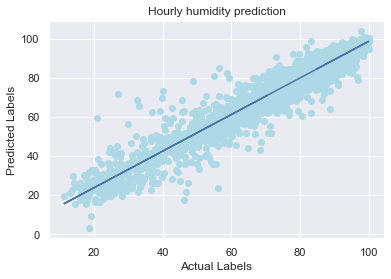

In [86]:
mse = mean_squared_error(y_test, lg_predict)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, lg_predict)
print("R2:", r2)

plt.scatter(y_test,lg_predict, color='lightblue')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Hourly humidity prediction')
z = np.polyfit(y_test,lg_predict, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.show()

## Training With Gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

In [88]:
gbrt = GradientBoostingRegressor(max_depth=10, n_estimators=500, learning_rate=0.01)
gbrt.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls',
                          max_depth=10, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
gbr_predict = gbrt.predict(x_test)

In [90]:
gbrt.score(x_test,y_test)

0.9327604630637091

## Ensemble Regressor Training

In [91]:
from sklearn.ensemble import VotingRegressor

In [92]:
voting_Ref = VotingRegressor(
 estimators=[('rf' , rf_reg), ('lgbm' , lg_reg), ('gb' , gbrt),('xgb' , gbm)])
voting_Ref. fit(x_train, y_train)

[06:48:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                     

In [93]:
for clf in (rf_reg,lg_reg,gbrt,gbm,voting_Ref):
    clf.fit(x_train, y_train)
    new_pred = clf. predict(x_test)
    print(clf. __class__. __name__, r2_score(y_test, new_pred))

RandomForestRegressor 0.927109104599402
LGBMRegressor 0.9365134531221128
GradientBoostingRegressor 0.9327989935827234
[06:49:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Tornado\.conda\envs\tensorflow_env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor 0.8824862420440792
[06:50:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
VotingRegressor 0.9313574505156228


In [94]:
X_train = np.append(arr=np.ones([x_train.shape[0],1]).astype(int),values=x_train,axis=1)

In [95]:
import joblib

# Save the model as a pickle file
filename = 'humidity-share.pkl'
joblib.dump(lg_reg, filename)

['humidity-share.pkl']

In [96]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[2.0,3.0,4.75,0.09330,45.0,976.35,34.56],
                  [2.0,7.0,3.80,0.09040,136.0,977.75,30.47]]).astype('float64')
print ('New sample: {}'.format(list(X_new)))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print(f'Prediction: {np.round(result)} RH')
print('Month',X_new[0][0])
print('Hour',X_new[0][1])

New sample: [array([2.0000e+00, 3.0000e+00, 4.7500e+00, 9.3300e-02, 4.5000e+01,
       9.7635e+02, 3.4560e+01]), array([2.0000e+00, 7.0000e+00, 3.8000e+00, 9.0400e-02, 1.3600e+02,
       9.7775e+02, 3.0470e+01])]
Prediction: [33. 34.] RH
Month 2.0
Hour 3.0
